In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import csv
import numpy as np
import pandas as pd
from tensorflow.keras import *
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
!cp "/content/drive/MyDrive/sample_001.csv" .
!cp "/content/drive/MyDrive/rewards_001.csv" .
!cp "/content/drive/MyDrive/rewards_012.csv" .
!cp "/content/drive/MyDrive/sample_012.zip" .
# !cp "/content/drive/MyDrive/sample_012_ns.zip" .
!cp "/content/drive/MyDrive/normal.zip" .

In [4]:
!unzip sample_012.zip

Archive:  sample_012.zip
  inflating: sample_012.csv          


In [5]:
!unzip normal.zip

Archive:  normal.zip
  inflating: double_normal/rewards_001.csv  
  inflating: double_normal/rewards_012.csv  
  inflating: single_normal/rewards_001.csv  
  inflating: single_normal/rewards_012.csv  


In [6]:
xTrain = []
with open('sample_012.csv') as trainCsvFile:
  spamreader = csv.reader(trainCsvFile)
  for row in spamreader:
    row = np.array(row).astype(float)
    xTrain.append(row)

In [7]:
yTrain = []
with open('rewards_012.csv') as trainCsvFile:
  spamreader = csv.reader(trainCsvFile)
  for row in spamreader:
    yTrain.append(float(row[0]))

In [8]:
xTest = []
with open('sample_001.csv') as testCsvFile:
  spamreader = csv.reader(testCsvFile)
  for row in spamreader:
    row = np.array(row).astype(float)
    xTest.append(row)

In [9]:
yTest = []
with open('rewards_001.csv') as testCsvFile:
  spamreader = csv.reader(testCsvFile)
  for row in spamreader:
    yTest.append(float(row[0]))

In [10]:
xTrainData = pd.read_csv("sample_012.csv", header=None)
yTrainData = pd.read_csv("rewards_012.csv", header=None)
yTrainDoubleNormal = pd.read_csv("double_normal/rewards_012.csv", header=None)
yTrainSingleNormal = pd.read_csv("single_normal/rewards_012.csv", header=None)

In [11]:
xTestData = pd.read_csv("sample_001.csv", header=None)
yTestData = pd.read_csv("rewards_001.csv", header=None)

In [12]:
yTestDoubleNormal = pd.read_csv("double_normal/rewards_001.csv", header=None)
yTestSingleNormal = pd.read_csv("single_normal/rewards_001.csv", header=None)

In [35]:
input_size = 1760
hidden_size = 1024
hidden_size_1 = 1024
hidden_size_2 = 1024
hidden_size_3 = 512
hidden_size_4 = 512
hidden_size_5 = 256
# hidden_size_6 = 64
# hidden_size_7 = 32
# hidden_size_8 = 16
# hidden_size_9 = 8
# hidden_size_10 = 4
# hidden_size_11 = 2
code_size = 128

activation = "linear"
kernel_initializer = None


x = Input(shape=(input_size, ))
out = layers.Flatten()(x)


# Encoder
hidden = layers.Dense(hidden_size, activation=activation, kernel_initializer=kernel_initializer)(out)
hidden = layers.Dense(hidden_size_1, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden =layers. Dense(hidden_size_2, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden =layers. Dense(hidden_size_3, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden =layers. Dense(hidden_size_4, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden =layers. Dense(hidden_size_5, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden =layers. Dense(hidden_size_6, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden =layers. Dense(hidden_size_7, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden =layers. Dense(hidden_size_8, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden =layers. Dense(hidden_size_9, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden =layers. Dense(hidden_size_10, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden =layers. Dense(hidden_size_11, activation=activation, kernel_initializer=kernel_initializer)(hidden)
h = layers.Dense(code_size, activation=activation, kernel_initializer=kernel_initializer)(hidden)

# Decoder
# hidden = layers.Dense(hidden_size_11, activation=activation, kernel_initializer=kernel_initializer)(h)
# hidden = layers.Dense(hidden_size_10, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden = layers.Dense(hidden_size_9, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden = layers.Dense(hidden_size_8, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden = layers.Dense(hidden_size_7, activation=activation, kernel_initializer=kernel_initializer)(hidden)
# hidden = layers.Dense(hidden_size_6, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden = layers.Dense(hidden_size_5, activation=activation, kernel_initializer=kernel_initializer)(h)
hidden = layers.Dense(hidden_size_4, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden = layers.Dense(hidden_size_3, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden = layers.Dense(hidden_size_2, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden = layers.Dense(hidden_size_1, activation=activation, kernel_initializer=kernel_initializer)(hidden)
hidden = layers.Dense(hidden_size, activation=activation, kernel_initializer=kernel_initializer)(hidden)
r = layers.Dense(input_size, activation=activation, kernel_initializer=kernel_initializer)(hidden)

autoencoder = models.Model(inputs=x, outputs=r)
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae')

In [36]:
autoencoder.fit(x=xTrainData, y=xTrainData, batch_size=30, epochs=30)

Epoch 1/30
264/264 [==============================] - 23s 85ms/step - loss: 0.0109
Epoch 2/30
264/264 [==============================] - 23s 86ms/step - loss: 0.0039
Epoch 3/30
264/264 [==============================] - 37s 139ms/step - loss: 0.0038
Epoch 4/30
264/264 [==============================] - 23s 87ms/step - loss: 0.0041
Epoch 5/30
264/264 [==============================] - 21s 79ms/step - loss: 0.0041
Epoch 6/30
264/264 [==============================] - 21s 78ms/step - loss: 0.0042
Epoch 7/30
264/264 [==============================] - 21s 80ms/step - loss: 0.0043
Epoch 8/30
264/264 [==============================] - 22s 82ms/step - loss: 0.0043
Epoch 9/30
264/264 [==============================] - 21s 80ms/step - loss: 0.0044
Epoch 10/30
264/264 [==============================] - 21s 79ms/step - loss: 0.0044
Epoch 11/30
264/264 [==============================] - 22s 84ms/step - loss: 0.0042
Epoch 12/30
264/264 [==============================] - 22s 84ms/step - loss: 0.0043


In [37]:
result = autoencoder.predict(xTestData)

In [38]:
def deserialize_heatmap(data):
    hm = []
    for i in range(11):
        page = []
        for j in range(16):
            row = []
            for k in range(10):
                row.append(data[(j * 10 + k) * 11 + i])
            page.append(row)
        hm.append(page)    
    return hm

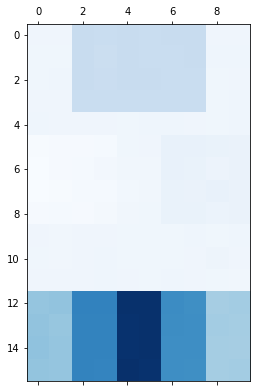

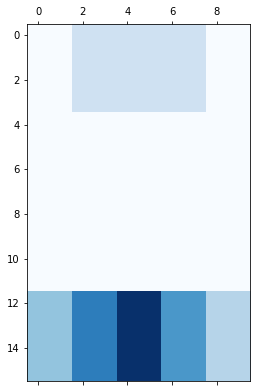

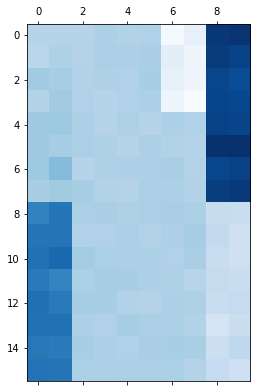

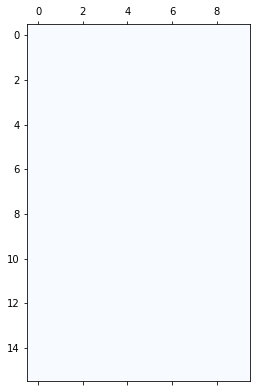

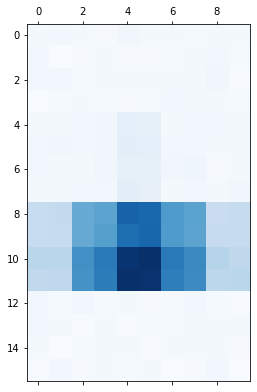

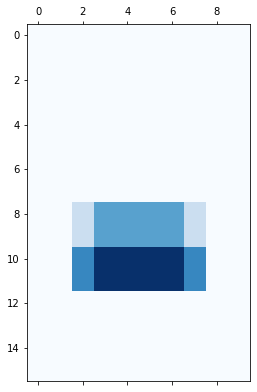

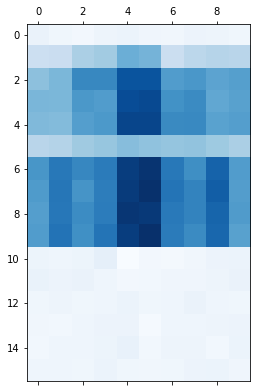

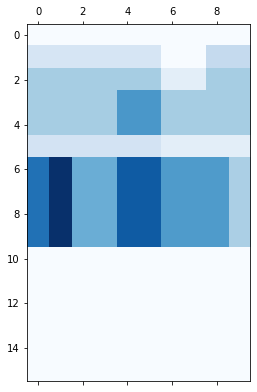

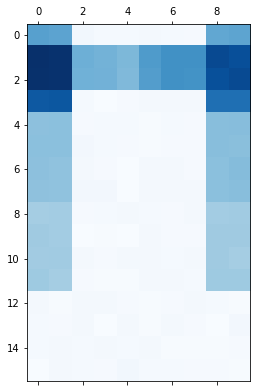

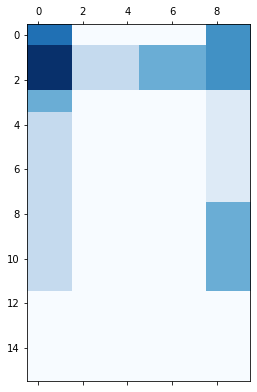

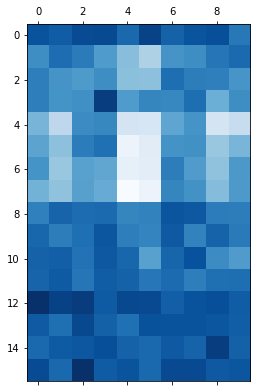

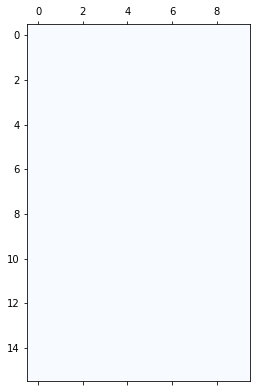

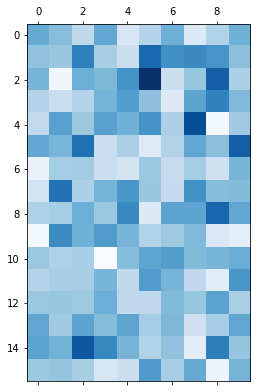

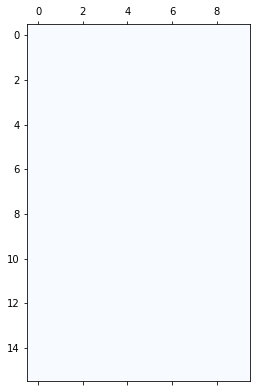

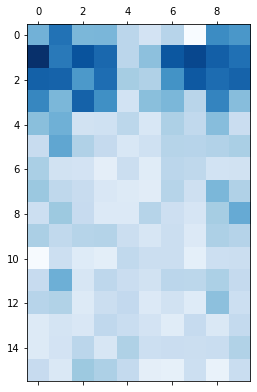

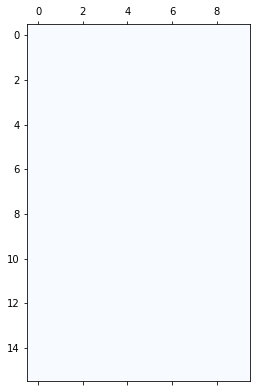

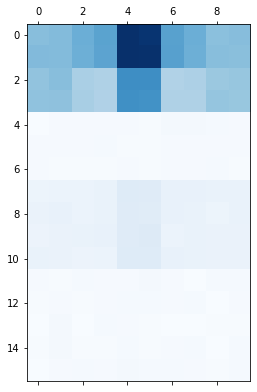

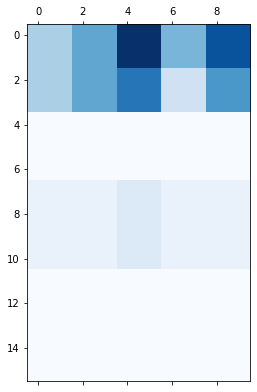

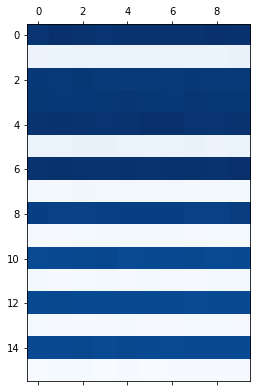

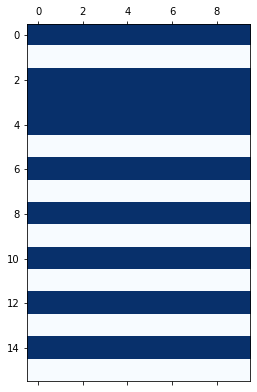

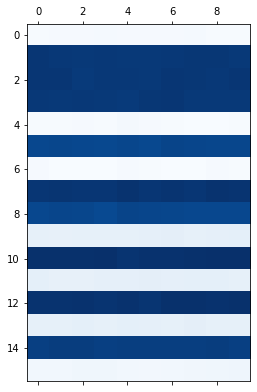

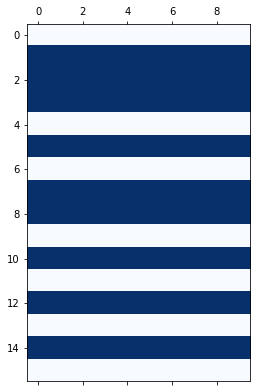

In [39]:
row = 4
for page in range(11):
  plt.matshow(deserialize_heatmap(result[row])[page], cmap='Blues')
  plt.show()
  plt.matshow(deserialize_heatmap(xTest[row])[page], cmap='Blues')
  plt.show()
# plt.matshow(hm[2], cmap='Greens')
# plt.show()
# plt.matshow(hm[3], cmap='Greens')
# plt.show()
# plt.matshow(hm[4], cmap='Greens')
# plt.show()
# plt.matshow(hm[5], cmap='Greens')
# plt.show()
# plt.matshow(hm[6], cmap='Reds')
# plt.show()
# plt.matshow(hm[7], cmap='Reds')
# plt.show()
# plt.matshow(hm[8], cmap='Reds')
# plt.show()
# plt.matshow(hm[9], cmap='Purples')
# plt.show()
# plt.matshow(hm[10], cmap='Purples')
# plt.show()

# Learning Reward Functions

In [13]:
class ValuePrediction():
  def __init__(self, xTrainData, yTrainData, xTestData, yTestData):
    self.xTrainData = xTrainData
    self.yTrainData = yTrainData
    self.xTestData = xTestData
    self.yTestData = yTestData
    self.ForwardFeed = None
    self.fit = None
    self.result = []

  def ForwardAdam(self, loss="mae", kernel_regularizer=None, learning_rate=0.001, activation="linear", kernel_initializer=None):
    inputs = layers.Input(shape=(1760,))
    out = layers.Flatten()(inputs)
    out = layers.Dense(1024, activation=activation, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer)(out)
    out = layers.Dense(1024, activation=activation, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer)(out)
    out = layers.Dense(1024, activation=activation, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer)(out)
    out = layers.Dense(1, activation=activation, kernel_regularizer=kernel_regularizer, kernel_initializer=kernel_initializer)(out)

    self.ForwardFeed = models.Model(inputs=inputs,outputs=out)
    self.ForwardFeed.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss=loss)

  def fitting(self, epochs=10, batch_size=5):
    self.fit = self.ForwardFeed.fit(x=self.xTrainData, y=self.yTrainData, epochs=epochs, batch_size=batch_size)

  def predict(self):
    self.result = self.ForwardFeed.predict(self.xTestData)
  
  def report(self):
    print("Rewards:\n", self.yTestData)
    print("Prediction:\n", self.result)
  
  def show(self, title):
    plt.plot(self.yTestData)
    plt.plot(self.result)
    plt.legend(['Actual Rewards', 'Predicted Rewards'])
    plt.title(title)
    plt.xlabel("Squads")
    plt.ylabel("Rewards")
    plt.show()

## Linear Function

### Normalizing Data

In [25]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(yTrainData)
yTrainNormalized = pd.DataFrame(d)

d = scaler.fit_transform(yTestData)
yTestNormalized = pd.DataFrame(d)

In [26]:
valuePredicator = ValuePrediction(xTrainData, yTrainNormalized, xTestData, yTestNormalized)
valuePredicator.ForwardAdam(kernel_initializer="lecun_normal", activation="selu")
valuePredicator.fitting(epochs=30, batch_size=30)

Epoch 1/30
264/264 [==============================] - 8s 30ms/step - loss: 0.1506
Epoch 2/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0598
Epoch 3/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0447
Epoch 4/30
264/264 [==============================] - 8s 31ms/step - loss: 0.0395
Epoch 5/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0391
Epoch 6/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0314
Epoch 7/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0262
Epoch 8/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0272
Epoch 9/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0241
Epoch 10/30
264/264 [==============================] - 9s 32ms/step - loss: 0.0249
Epoch 11/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0242
Epoch 12/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0242
Epoch 13/30
2

In [27]:
valuePredicator.predict()
# valuePredicator.report()

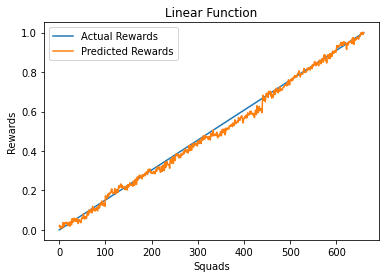

In [28]:
valuePredicator.show("Linear Function")

## Normal Distribution - Single Peak

### Normalizing Data

In [17]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(yTrainSingleNormal)
yTrainSingleNormalized = pd.DataFrame(d)

d = scaler.fit_transform(yTestSingleNormal)
yTestSingleNormalized = pd.DataFrame(d)

In [18]:
valuePredicator = ValuePrediction(xTrainData, yTrainSingleNormalized, xTestData, yTestSingleNormalized)
valuePredicator.ForwardAdam(kernel_initializer="lecun_normal", activation="selu")
valuePredicator.fitting(epochs=30, batch_size=30)

Epoch 1/30
264/264 [==============================] - 8s 30ms/step - loss: 0.1867
Epoch 2/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0828
Epoch 3/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0609
Epoch 4/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0588
Epoch 5/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0500
Epoch 6/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0453
Epoch 7/30
264/264 [==============================] - 8s 31ms/step - loss: 0.0471
Epoch 8/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0471
Epoch 9/30
264/264 [==============================] - 9s 33ms/step - loss: 0.0407
Epoch 10/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0408
Epoch 11/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0410
Epoch 12/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0357
Epoch 13/30
2

In [19]:
valuePredicator.predict()
# valuePredicator.report()

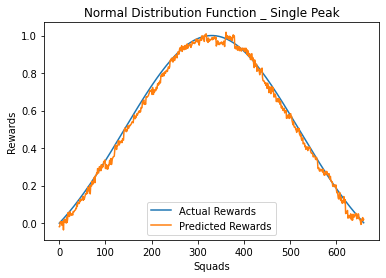

In [20]:
valuePredicator.show("Normal Distribution Function - Single Peak")

## Normal Distribution - Double Peaks

### Normalizing Data

In [21]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(yTrainDoubleNormal)
yTrainDoubleNormalized = pd.DataFrame(d)

d = scaler.fit_transform(yTestDoubleNormal)
yTestDoubleNormalized = pd.DataFrame(d)

In [22]:
valuePredicator = ValuePrediction(xTrainData, yTrainDoubleNormalized, xTestData, yTestDoubleNormalized)
valuePredicator.ForwardAdam(kernel_initializer="lecun_normal", activation="selu")
valuePredicator.fitting(epochs=30, batch_size=30)

Epoch 1/30
264/264 [==============================] - 8s 30ms/step - loss: 0.1974
Epoch 2/30
264/264 [==============================] - 8s 30ms/step - loss: 0.1077
Epoch 3/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0857
Epoch 4/30
264/264 [==============================] - 8s 29ms/step - loss: 0.0713
Epoch 5/30
264/264 [==============================] - 9s 34ms/step - loss: 0.0594
Epoch 6/30
264/264 [==============================] - 9s 33ms/step - loss: 0.0557
Epoch 7/30
264/264 [==============================] - 10s 37ms/step - loss: 0.0579
Epoch 8/30
264/264 [==============================] - 8s 30ms/step - loss: 0.0485
Epoch 9/30
264/264 [==============================] - 12s 44ms/step - loss: 0.0428
Epoch 10/30
264/264 [==============================] - 12s 44ms/step - loss: 0.0382
Epoch 11/30
264/264 [==============================] - 13s 48ms/step - loss: 0.0424
Epoch 12/30
264/264 [==============================] - 8s 31ms/step - loss: 0.0372
Epoch 13/

In [23]:
valuePredicator.predict()
# valuePredicator.report()

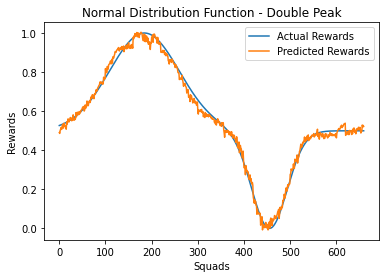

In [24]:
valuePredicator.show("Normal Distribution Function - Double Peak")